# Heart Disease Prediction Using Machine Learning

#### Data contains;

age - age in years

sex - (1 = male; 0 = female)

cp- chest pain type
(0: Typical angina;
1: Atypical angina;
2: Non-angnial pain;
3: Asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 1 = normal; 2 = fixed defect; 3 = reversable defect

target - have disease or not (1 = yes, 0 = no) 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv(r'C:\Users\munee\Downloads\Data\heart.csv')

In [3]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
d.shape

(1025, 14)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
d.target.value_counts() #have disease or not (1 = yes, 0 = no)

1    526
0    499
Name: target, dtype: int64

In [9]:
d.sex.value_counts() #sex - (1 = male; 0 = female)

1    713
0    312
Name: sex, dtype: int64

### Perform Data Validation Checks (all that are necessary e.g null check etc)

In [10]:
d.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Identify unique value in a columns

In [12]:
print('sex ',d['sex'].unique())
print('cp ',d['cp'].unique())
print('fbs ',d['fbs'].unique())
print('restecg ',d['restecg'].unique())
print('exang ',d['exang'].unique())
print('slope ',d['slope'].unique())
print('ca ',d['ca'].unique())
print('thal ',d['thal'].unique())
print('target ',d['target'].unique())

sex  [1 0]
cp  [0 1 2 3]
fbs  [0 1]
restecg  [1 0 2]
exang  [0 1]
slope  [2 0 1]
ca  [2 0 1 3 4]
thal  [3 2 1 0]
target  [0 1]


In [13]:
print('age ',d['age'].unique())
print('trestbps ',d['trestbps'].unique())
print('chol ',d['chol'].unique())
print('thalach ',d['thalach'].unique())
print('oldpeak ',d['oldpeak'].unique())

age  [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
trestbps  [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol  [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
thalach  [168 155 125 161 106 122 1

In [15]:
d.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [18]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(d[d['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(d[d['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', d[d['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease:  134.1062124248497


In [19]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(d[d['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(d[d['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', d[d['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  129.24524714828897


# Exploratory Data Analysis (EDA)

### 1- Histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

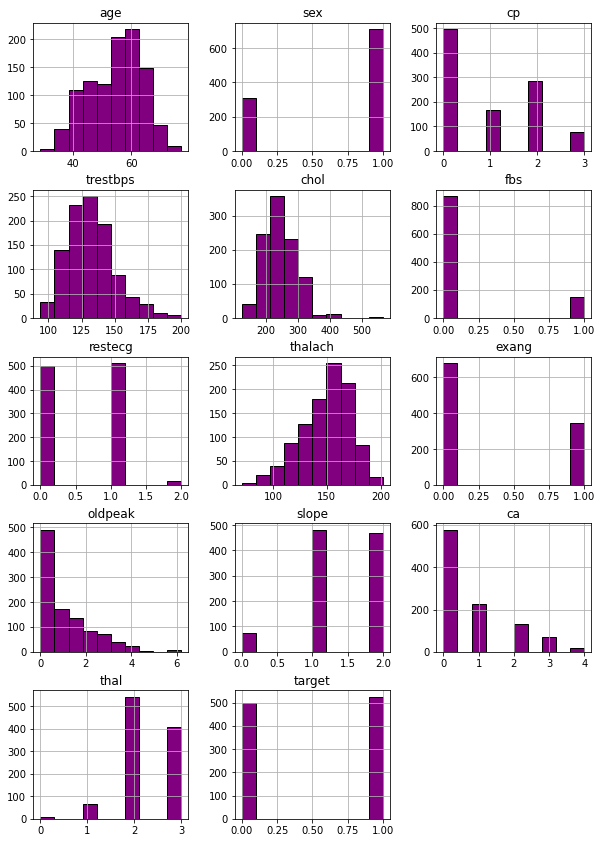

In [24]:
d.hist(edgecolor='black',layout = (10, 3),
            figsize = (10, 30),
            color=['purple'])

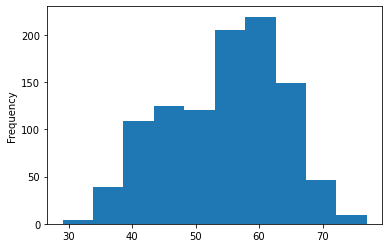

In [25]:
# Check the distribution of the age column with a histogram
d.age.plot.hist();

### 2- ScatterPlot

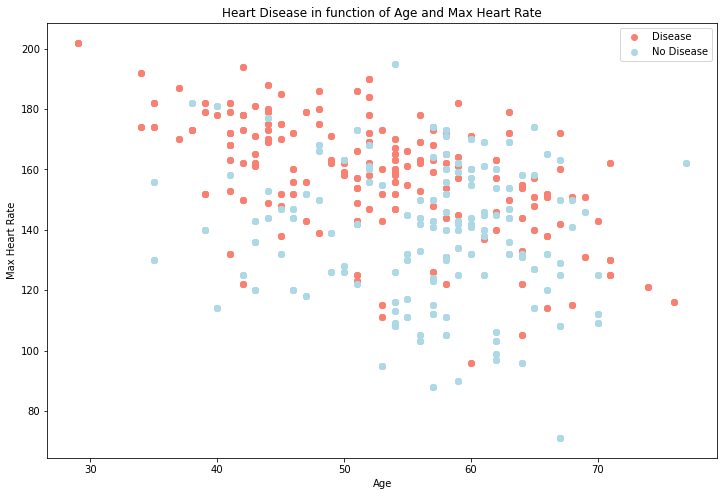

In [28]:
plt.figure(figsize=(12,8))

# scatter with positive examples
plt.scatter(d.age[d.target==1],
            d.thalach[d.target==1],
            c="salmon");

# scatter with negative exaples
plt.scatter(d.age[d.target==0],
            d.thalach[d.target==0],
            c="lightblue");
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### 3- BarPlot

Text(0.5, 1.0, 'Ages of Heart Disease Patients and Non-Heart Disease Patients\n')

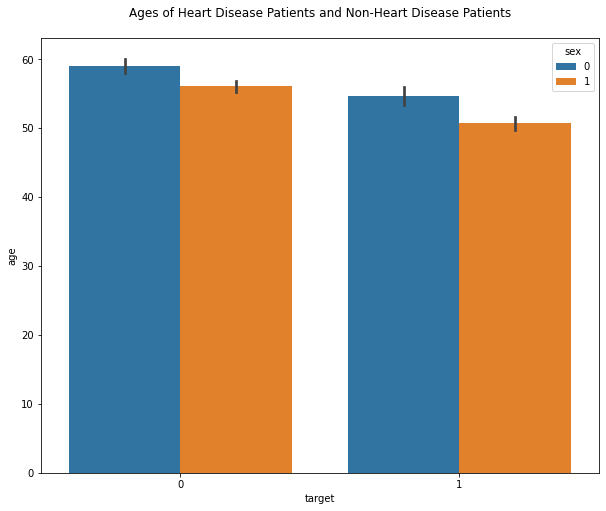

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(data=d,x='target',y='age', hue="sex")
plt.title('Ages of Heart Disease Patients and Non-Heart Disease Patients\n')

### 4- LinePlot

Text(0.5, 1.0, 'Ages of Cholestrol Patients\n')

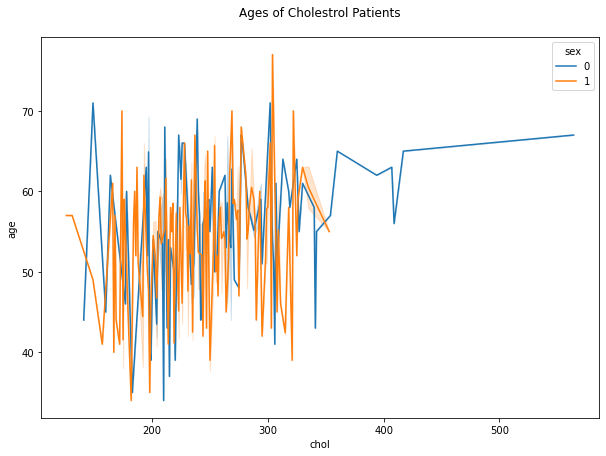

In [31]:
plt.figure(figsize=(10,7))
sns.lineplot(data=d,x='chol',y='age', hue="sex")
plt.title('Ages of Cholestrol Patients\n')

<AxesSubplot:xlabel='age', ylabel='chol'>

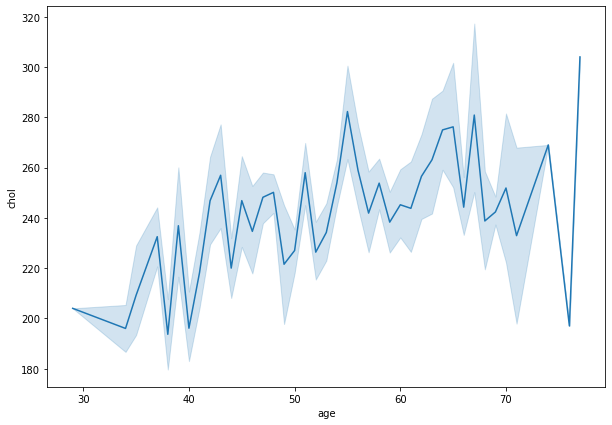

In [32]:
plt.figure(figsize=(10,7))
sns.lineplot(x = d["age"], y= d["chol"])

### 5- CrossTab

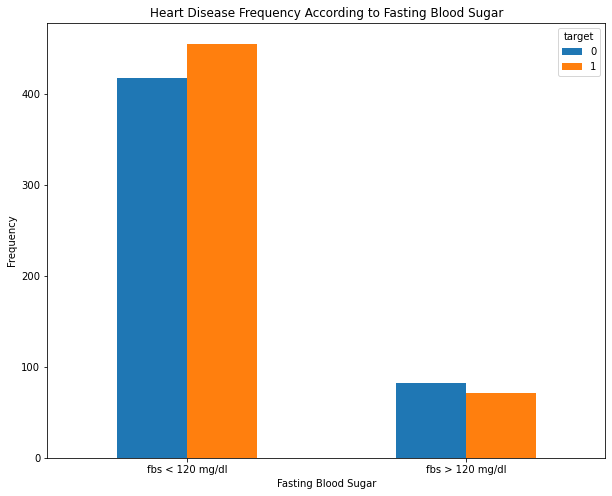

In [39]:
pd.crosstab(d.fbs,d.target).plot(kind = "bar", figsize = (10, 8))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

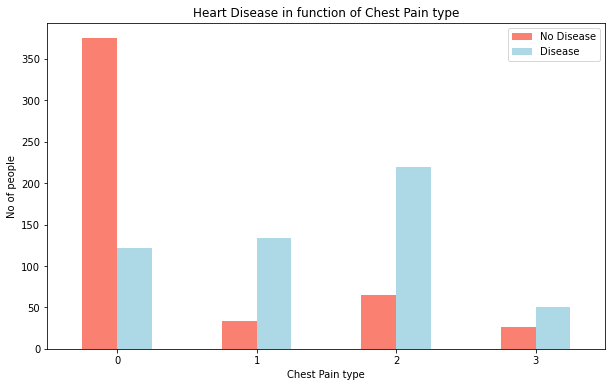

In [41]:
pd.crosstab(d.cp,d.target).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])

plt.title("Heart Disease in function of Chest Pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("No of people")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

### 6- HeatMap

<AxesSubplot:>

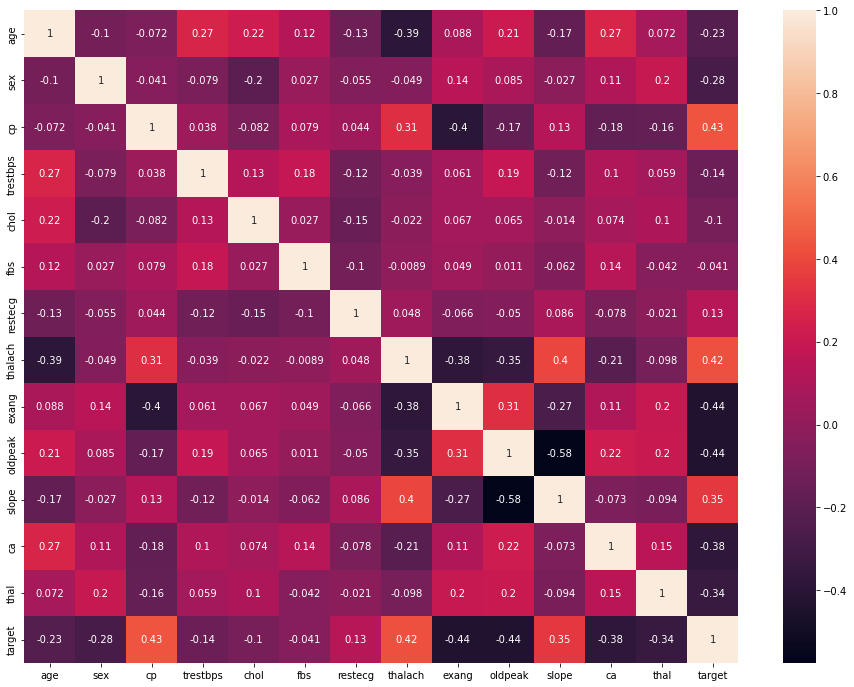

In [45]:
plt.figure(figsize=(16,12))
sns.heatmap(d.corr(),annot=True)

### 7- CountPlot

In [56]:
df = d.copy()  # Copy Dataset

In [57]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df['sex'] = df['sex'].apply(chng)

In [58]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df['target'] = df['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

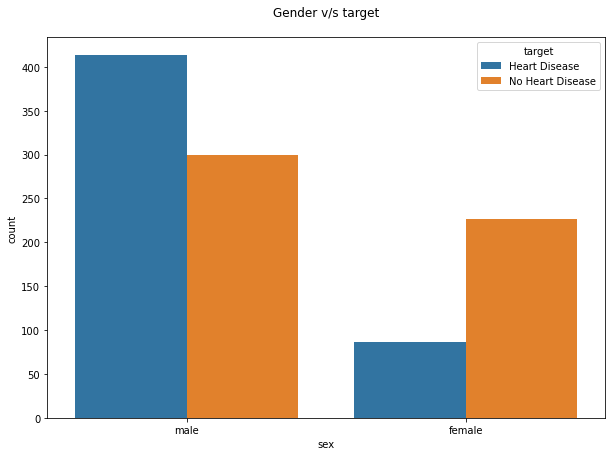

In [59]:
plt.figure(figsize=(10,7))
sns.countplot(data= df, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

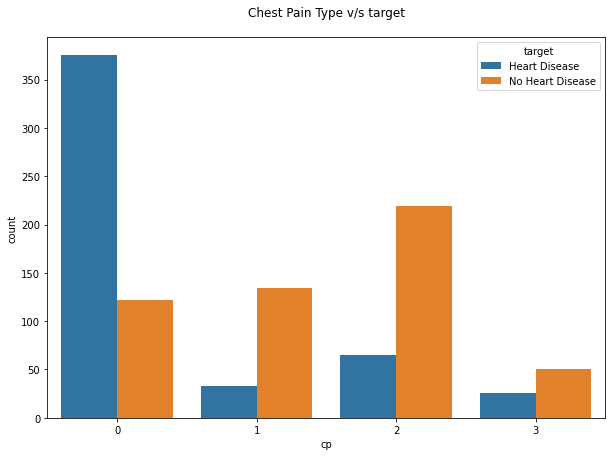

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(data= df, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

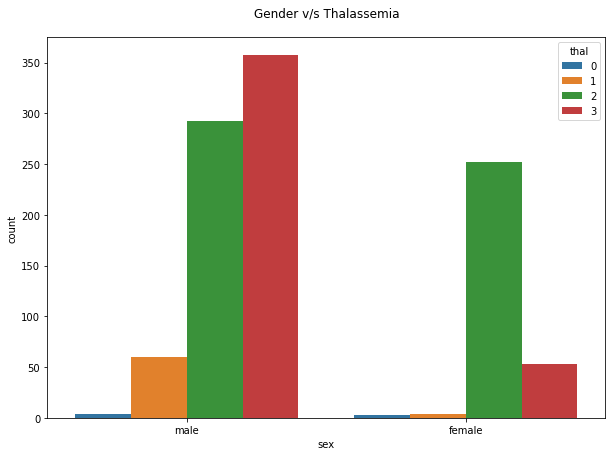

In [61]:
plt.figure(figsize=(10,7))
sns.countplot(data= df, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

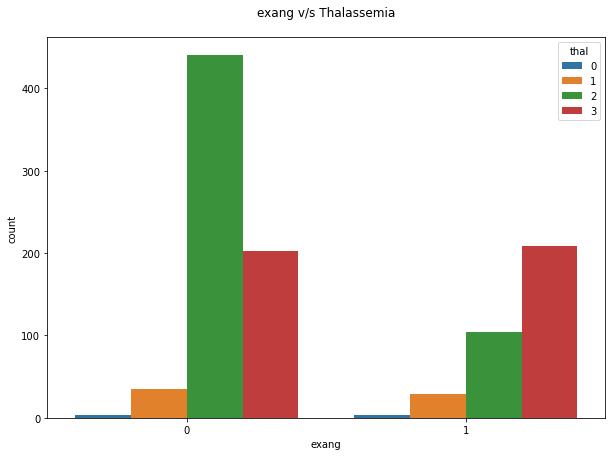

In [62]:
plt.figure(figsize=(10,7))
sns.countplot(data= df, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

### 8- BoxPlot

<AxesSubplot:xlabel='target', ylabel='age'>

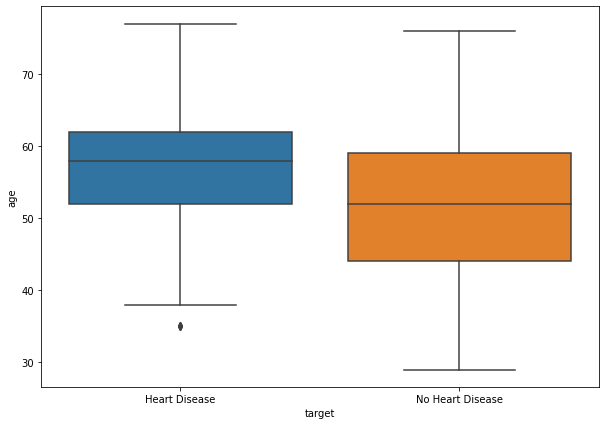

In [63]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='target',y='age')

### 9- CatPlot

Text(0.5, 1.0, 'Chest in Pain v/s Cholestrol\n')

<Figure size 720x504 with 0 Axes>

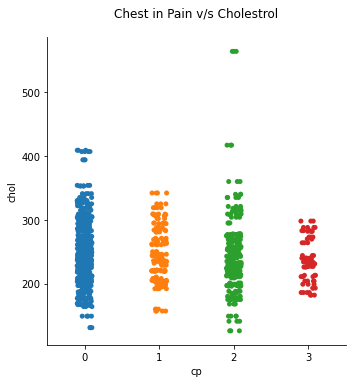

In [65]:
plt.figure(figsize=(10,7))
sns.catplot(x="cp", y="chol", data=df);
plt.title('Chest in Pain v/s Cholestrol\n')

Heart disease frequence per chest pain type

cp- chest pain type

0: Typical angina
    
1: Atypical angina
    
2: Non-angnial pain
    
3: Asymptomatic

### 10- ClusterMap

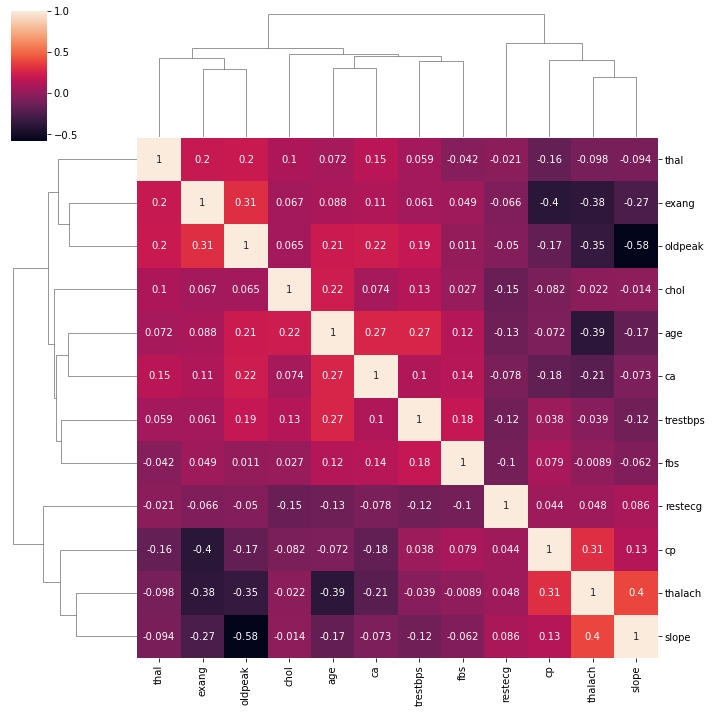

In [67]:
sns.clustermap(df.corr(),annot=True)

### 11- JointPlot

<Figure size 864x576 with 0 Axes>

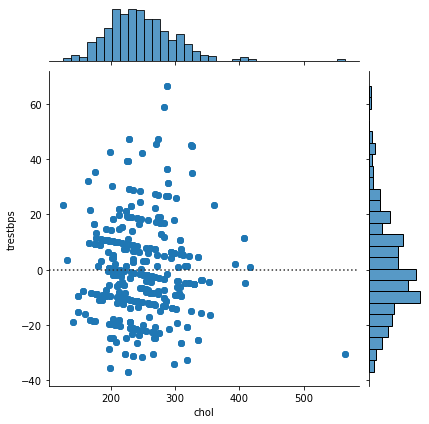

In [69]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df,
              x='chol',
              y='trestbps',
              kind='resid',
              )

<Figure size 864x576 with 0 Axes>

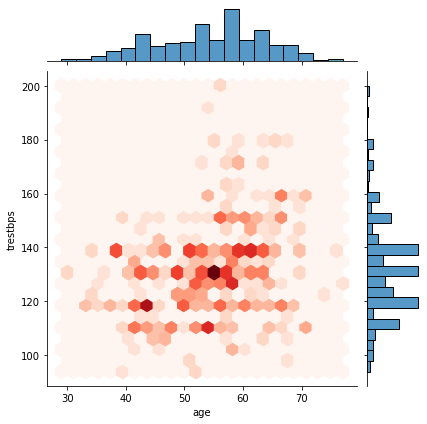

In [72]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
              )

# Predictive Machine Learning Models Implications

In [75]:
# Models from scikit-learn
from sklearn.linear_model import LogisticRegression# Import Logistic Regression
from sklearn.neighbors import KNeighborsClassifier# Import KNeighbors Classifier
from sklearn.ensemble import RandomForestClassifier# Import Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = d.iloc[:,0:13] # Features
y = d.iloc[:,13] # Target variable
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3886, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=45)
from sklearn.metrics import accuracy_score

In [82]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()
         }

# function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(100)
    model_scores = {}
    for name, model in models.items():
        #fit the model
        model.fit(X_train, y_train)
        #append the score of the model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [85]:
model_scores = fit_and_score(models=models, 
                             X_train = X_train, 
                             X_test = X_test, 
                             y_train = y_train, 
                             y_test = y_test)
model_scores

C:\Users\munee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.802439024390244,
 'KNN': 0.7024390243902439,
 'Decision Tree': 0.975609756097561,
 'Random Forest': 0.9853658536585366}

In [86]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Decision Tree,Random Forest
accuracy,0.802439,0.702439,0.97561,0.985366


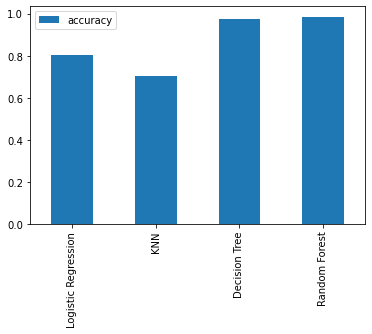

In [87]:
model_compare.T.plot.bar();

### Random Forest Classifier

#### First Method

In [91]:
# Create Random Forest classifer object
lr = RandomForestClassifier()

# Train Random Forest Classifer
lr.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_lr)+" %")

The accuracy score achieved using Random Forest is: 98.54 %


#### Second Method

In [93]:
# Create Random Forest classifer object
clf = RandomForestClassifier()

# Train Random Forest Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9853658536585366


### Decision Tree Classifier

#### First Method

In [97]:
# Create Decision Tree classifer object
lr = DecisionTreeClassifier()

# Train Decision Tree Classifer
lr.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_lr)+" %")

The accuracy score achieved using Decision Tree is: 97.8 %


#### Second Method

In [100]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.975609756097561


# Confusion Matrix

In [104]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:')
accuracy_score(y_test, y_pred)

[[198   4]
 [  6 202]]
Accuracy:


0.975609756097561

### Random Forest Classifier

In [106]:
model1 = RandomForestClassifier(random_state=100)# get instance of model
model1.fit(X_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       202
           1       1.00      0.97      0.99       208

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410



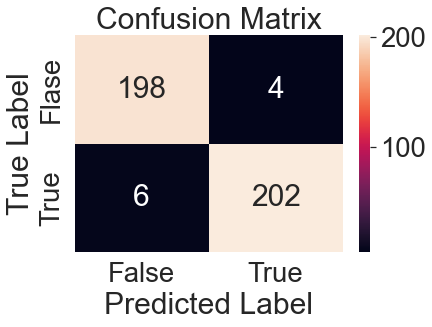

In [110]:
plot_confusion_matrix(model1, X_test, y_test)
ax = plt.subplot()
sns.set(font_scale=2.5) #edited as suggested
sns.heatmap(cm,annot=True,fmt="g" );  

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);

label_font = {'size':'14'}  # Adjust to fit


plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Decision Tree Classifier

In [111]:
model2 = DecisionTreeClassifier(random_state=100)# get instance of model
model2.fit(X_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       202
           1       0.98      0.97      0.98       208

    accuracy                           0.98       410
   macro avg       0.98      0.98      0.98       410
weighted avg       0.98      0.98      0.98       410



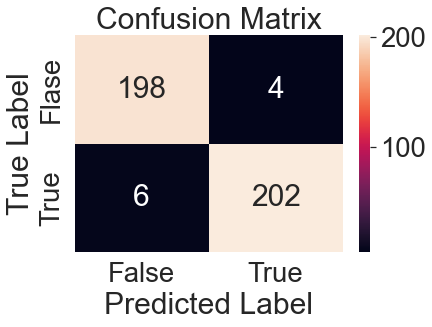

In [112]:
plot_confusion_matrix(model1, X_test, y_test)
ax = plt.subplot()
sns.set(font_scale=2.5) #edited as suggested
sns.heatmap(cm, annot=True, fmt="g" );  
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);

label_font = {'size':'14'}  # Adjust to fit


plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Conclusion

Best result was achieved by using Random Forest Classification Model for this predictive analysis.

Using Random Forest classfier model and Decision Tree classfier model we are getting above 97% accuracy.